In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams as rc

In [2]:
rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=2
rc['lines.markersize']=8
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

In [3]:
def annotate_scaling(self, val, exp, place='top', ls='--',p=2.5, t=2):
    #val=[x,y]
    XX=np.array([val[0]/p, val[0]*p])
    fXX=XX**exp
    self.loglog(XX, (val[1]/np.mean(fXX))*fXX,c='k',ls=ls)
    
    if exp==1: label='$\\sim t$'
    else: label= '$\\sim t^{{{}}}$'.format(exp)
    
    if place=='top':
         self.text(val[0]/t,val[1],label)
    
    elif place=='bottom':
        self.text(val[0],val[1]/t,label)


g=0.1

def msd_free(t,temp, F0, t0):
    # F0=0
    return (2*F0**2*t0/0.1**2)*(t+t0*np.exp(-t/t0)-t0)+2*temp*t/0.1
        

def msd_RC_COM(t,temp, F0, t0, N):
    # F0=0
    return (2*F0**2*t0/(N*g**2))*(t+t0*np.exp(-t/t0)-t0)+2*temp*t/(N*g)
    
def tau_p(p1,k1,Nn):
    g=0.1
    return g*Nn**2/(np.pi**2*k1*p1**2)

def MSD_Rouse(t,T1,F1,ta,Nn,k1):
    def 
    g=0.1
    
    ret=(6*(T1+F1**2*ta/g)*t/(Nn*g) - 6*F1**2*ta**2*(1-np.exp(-t/ta))/(Nn*g**2)
        + 12

No handles with labels found to put in legend.


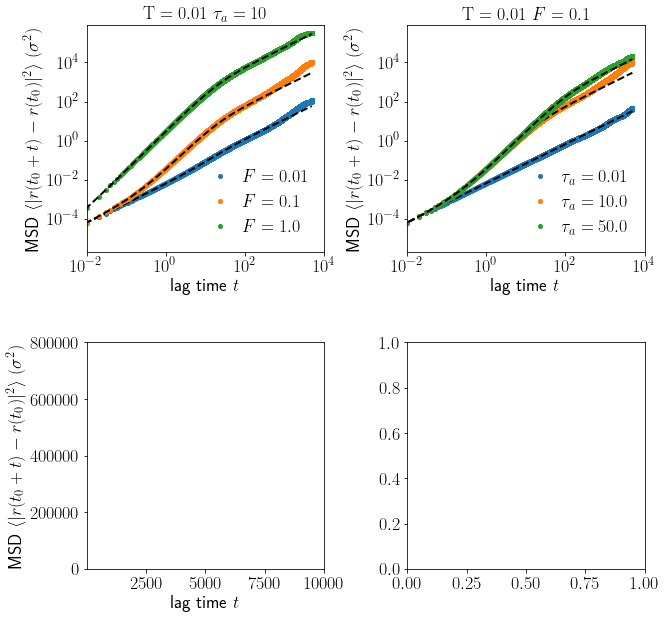

In [42]:
fig1,axes=plt.subplots(2,2,figsize=(10,10),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[[ax1,ax2],[ax3,ax4]]=axes
dt=0.001
bl=10
ts=np.arange(0,489901,1)*bl*dt
N=100
fpath='../Rouse_chain_unconfined_kb3T/'
yval=[]
xval=[]
ind=5
for fname in os.listdir(fpath):
    if 'MSD' in fname and 'npz' in fname and 'COM' in fname:
        # print(fname.split('_'))
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        #kb=float(fname.split('_')[8].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        #print(Ta)
        #print(T,F,Ta,Esoft,vf)
        # if R0!=20: continue
        # xval.append(F**2*Ta/(0.1*T))
        npzfile=np.load(fpath+fname)
        # slopes=np.gradient(np.log(npzfile['MSD'][1]))/np.gradient(np.log(ts))
        # yval.append(max(slopes[2:-40000]))
        # print(npzfile['MSD_COM'].shape)
        # continue
        if T==0.01 and Ta==10.0:
        # ax3.semilogx(ts[2:-40000],slopes[2:-40000])
        # print(npzfile["MSD"].shape)
            # if F==1.0: continue
        #ax1.loglog(ts, npzfile['MSD'][1], '.-', label='$F={}$'.format(F))
            ax1.loglog(ts, 0.5*(npzfile['MSD_COM'][1]+npzfile['MSD_COM'][2]), '.', label='$F={}$'.format(F))
            # ax1.loglog(ts,3*msd_free(ts,T,F,Ta),'k--')
            ax1.loglog(ts,3*msd_RC_COM(ts,T,F,Ta,N),'k--')
            # print(T,F,Ta)
            ax1.set_title('$\\mathrm T={}$ $\\tau_a={:.0f}$ '.format(T,Ta,))

        if T==0.01 and F==0.1:
            ax2.loglog(ts, 0.5*(npzfile['MSD_COM'][1]+npzfile['MSD_COM'][2]), '.', label='$\\tau_a={}$'.format(Ta))
            # ax2.loglog(ts,3*msd_free(ts,T,F,Ta),'k--')
            ax2.loglog(ts,3*msd_RC_COM(ts,T,F,Ta,N),'k--')
            ax2.set_title('$\\mathrm T={}$ $F={}$ '.format(T,F))

        # if F==0.1 and Ta==50.0 and T!=2:
        #     ax3.loglog(ts, npzfile['MSD'][1], '.', label='$\\mathrm T={}$'.format(T))
        #     ax3.loglog(ts,3*msd_free(ts,T,F,Ta),'k--')
        #     ax3.set_title('$F={}$ $\\tau_a={}$'.format(F,Ta))


for axi in [ax1,ax3,ax2]:
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('MSD $\\langle |r(t_0+t) - r(t_0)|^2\\rangle$ $(\\sigma^2)$')
    
    # handles, labels = axi.get_legend_handles_labels()
    # #print(labels)
    # hl = sorted(zip(handles, labels),
    #         key=lambda x: float(x[1].split('=')[1].replace('$','')))
    # handles2, labels2 = zip(*hl)
    # #print(labels2)
    # axi.legend(handles2, labels2)
    axi.legend(loc='lower right')
    axi.set_ylim([2e-6,8e5])
    # axi.axvline(ts[n])
    axi.set_xlim([1e-2,1e4])
    # axi.axhline(17**2,c='k',ls=':')
# ax3.set_ylim(1e-3,2e6)
# ax3.legend(loc='lower right')

# ax4.semilogx(xval,yval,'.')
# ax4.set_ylim([0.8,2.2])
# ax4.set_xlim(2e-6,8e5)
# ax4.text(2e-4,2, 'MSD $\\sim t^\\alpha$')
# ax4.set_xlabel('$F^2\\tau_a/(\\gamma\\mathrm T)$')
# ax4.set_ylabel('Maximum exponent $\\max\\{\\alpha\\}$')
# ax4.axvline(1, c='k',ls='--',lw=1)



# annotate_scaling(ax3,[20,1e2],0.5,place='bottom',p=3,t=2.5)  
# annotate_scaling(ax3,[1e3,6e3],1,place='bottom',p=4,t=3.5) 
# #annotate_scaling(ax3,[2,20],0.2,placement='top',sc=2.5)  

fig1.savefig('../plots/Rouse_chain_unconfined_MSDs_active.png', dpi=300, bbox_inches='tight')

In [29]:
print(xval,yval)

[0.1, 10.000000000000002, 1000.0, 4000.0, 0.009999999999999998, 1.0, 99.99999999999999, 399.99999999999994, 0.001, 0.10000000000000002, 10.0, 40.0, 0.0001, 0.010000000000000002, 1.0, 4.0, 0.0005, 0.05000000000000001, 5.0, 20.0] [1.0193006886170852, 1.5819060616648897, 1.8115229621337627, 1.8077723137548312, 1.0017185825238175, 1.1607495664019893, 1.781466110024631, 1.7997202461048414, 0.9963444435841107, 1.0160554911428148, 1.5701610542105087, 1.727350230149804, 0.9883037753418418, 0.9895132437691708, 1.1398308045254828, 1.3704028328567603, 0.9950099647484839, 1.0047024586034359, 1.4353822198888564, 1.66038462233432]


/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


"\nannotate_scaling(ax1,[2,15],0.5,place='top',p=3,t=2.5)   \n#annotate_scaling(ax1,[6e3,1e3],1,place='bottom',p=2.5,t=3)\nannotate_scaling(ax1,[15,80],1,place='top',p=2.1,t=2.1) \n#annotate_scaling(ax1,[10,.5],1.5,place='bottom',p=2.,t=2.5)      \n#annotate_scaling(ax1,[2,40],0.5,place='top',t=2.5)   \n\nannotate_scaling(ax2,[6,10],0.5,place='bottom',p=3,t=2.5)   \n#annotate_scaling(ax2,[1e2,1e1],1,place='bottom',p=2.5,t=3)\n\nannotate_scaling(ax3,[1.5,80],1.5,place='top',p=3,t=1.5) \nannotate_scaling(ax3,[2,3],0.5,place='bottom',p=3,t=1.4)  \n#annotate_scaling(ax3,[1e3,6e3],1,place='bottom',p=4,t=3.5) \n#annotate_scaling(ax3,[2,20],0.2,placement='top',sc=2.5)  \n"

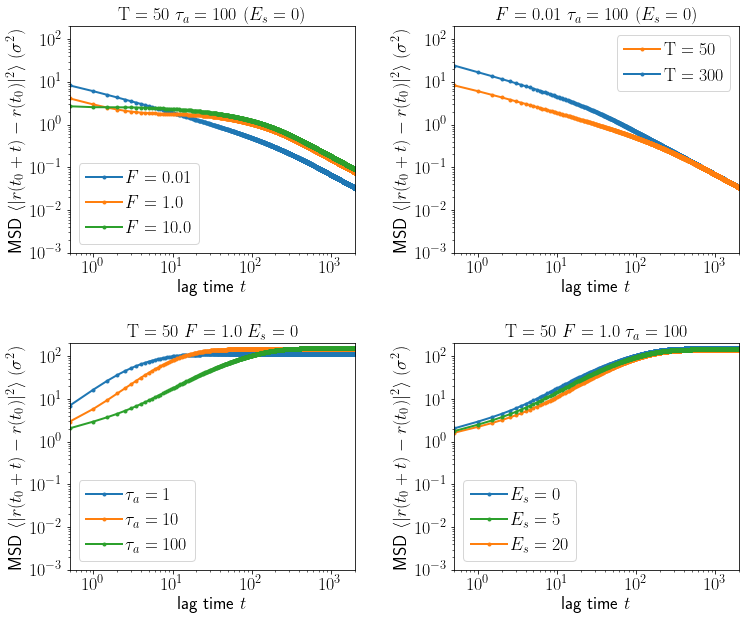

In [181]:
fig2,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[[ax1,ax2],[ax3,ax4]]=axes
dt=0.001
bl=500
ts=np.arange(0,99901,1)*bl*dt
g=0.1
fpath='../data-8-rings/'
for fname in os.listdir(fpath):
    if 'MSD' in fname and 'npz' in fname and 'COM' not in fname:
        #print(fname.split('_'))
        T= float(fname.split('_')[4].replace('T',''))
        F=float(fname.split('_')[6].replace('F',''))
        Ta=float(fname.split('_')[7].replace('Ta',''))
        #kb=float(fname.split('_')[8].replace('kb',''))
        Esoft=float(fname.split('_')[9].replace('Esoft',''))
        vf=float(fname.split('_')[10].replace('vf',''))
        if vf==0.0: vf=0.00001
        #print(T,F,Ta,Esoft,vf)
        
        if T==50.0 and Esoft==0 and Ta==100.0 and vf==0.1:
            #if F==0.0: continue
            npzfile=np.load(fpath+fname)
            #print(npzfile['MSD'][0][1])
            ax1.loglog(ts, npzfile['MSD'][0]/ts, '.-', label='$F={}$'.format(F))
            ax1.set_title('$\\mathrm T={:.0f}$ $\\tau_a={:.0f}$ $(E_s={:.0f})$ '.format(T,Ta,Esoft,vf))
            #print(fname.split('_'))
            
        if Ta==100.0 and F==0.01 and Esoft==0 and vf==0.1:
            if T==0: continue
            npzfile=np.load(fpath+fname)
            #print(T)
            ax2.loglog(ts, npzfile['MSD'][0]/ts, '.-', label='$\\mathrm T={:.0f}$'.format(T))
            ax2.set_title('$F={}$ $\\tau_a={:.0f}$ $(E_s={:.0f})$ '.format(F,Ta,Esoft,vf))
            #print(T,F,Ta,kb,Esoft)
            
        if (T==50.0) and F==1.0 and Esoft==0 and vf==0.1:
            npzfile=np.load(fpath+fname)
            #print(T)
            ax3.loglog(ts, npzfile['MSD'][0], '.-', label='$\\tau_a={:.0f}$'.format(Ta))
            ax3.set_title('$\\mathrm T={:.0f}$ $F={}$ $E_s={:.0f}$'.format(T, F, Esoft))
            #print(fname)
            #print(T,F,Ta,kb,Esoft)
        
        if (T==50.0) and (F==1) and Ta==100.0 and vf==0.1:
            npzfile=np.load(fpath+fname)
            #print(T)
            ax4.loglog(ts, npzfile['MSD'][0], '.-', label='$E_s={:.0f}$'.format(Esoft))
            
            ax4.set_title('$\\mathrm T={:.0f}$ $F={}$ $\\tau_a={:0.0f}$'.format(T, F, Ta))
            #print(fname)

for axi in axes.flatten():
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('MSD $\\langle |r(t_0+t) - r(t_0)|^2\\rangle$ $(\\sigma^2)$')
    
    handles, labels = axi.get_legend_handles_labels()
    #print(labels)
    hl = sorted(zip(handles, labels),
            key=lambda x: float(x[1].split('=')[1].replace('$','')))
    handles2, labels2 = zip(*hl)
    #print(labels2)
    axi.legend(handles2, labels2)
    #axi.legend(loc='lower right')
    axi.set_ylim([1e-3,2e2])
    axi.set_xlim([5e-1,2e3])

#ax1.legend(ncol=2)
#ax4.legend(ncol=2)
#ax1.set_ylim([1,2e5])
#ax1.legend(loc='lower right',)
#ax2.set_ylim([10,60])
#ax3.set_ylim([10,80])
#ax4.set_ylim([10,5e3])
"""
annotate_scaling(ax1,[2,15],0.5,place='top',p=3,t=2.5)   
#annotate_scaling(ax1,[6e3,1e3],1,place='bottom',p=2.5,t=3)
annotate_scaling(ax1,[15,80],1,place='top',p=2.1,t=2.1) 
#annotate_scaling(ax1,[10,.5],1.5,place='bottom',p=2.,t=2.5)      
#annotate_scaling(ax1,[2,40],0.5,place='top',t=2.5)   

annotate_scaling(ax2,[6,10],0.5,place='bottom',p=3,t=2.5)   
#annotate_scaling(ax2,[1e2,1e1],1,place='bottom',p=2.5,t=3)

annotate_scaling(ax3,[1.5,80],1.5,place='top',p=3,t=1.5) 
annotate_scaling(ax3,[2,3],0.5,place='bottom',p=3,t=1.4)  
#annotate_scaling(ax3,[1e3,6e3],1,place='bottom',p=4,t=3.5) 
#annotate_scaling(ax3,[2,20],0.2,placement='top',sc=2.5)  
"""
#fig2.savefig('../plots/Rouse_chain_MSD_semidilute-phase.png', dpi=300, bbox_inches='tight')

['Rouse', 'chain', 'T300.0', 'g0.1', 'F0.01', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']
['Rouse', 'chain', 'T300.0', 'g0.1', 'F0.1', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']
['Rouse', 'chain', 'T300.0', 'g0.1', 'F1.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']
['Rouse', 'chain', 'T300.0', 'g0.1', 'F20.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']


(2e-05, 1)

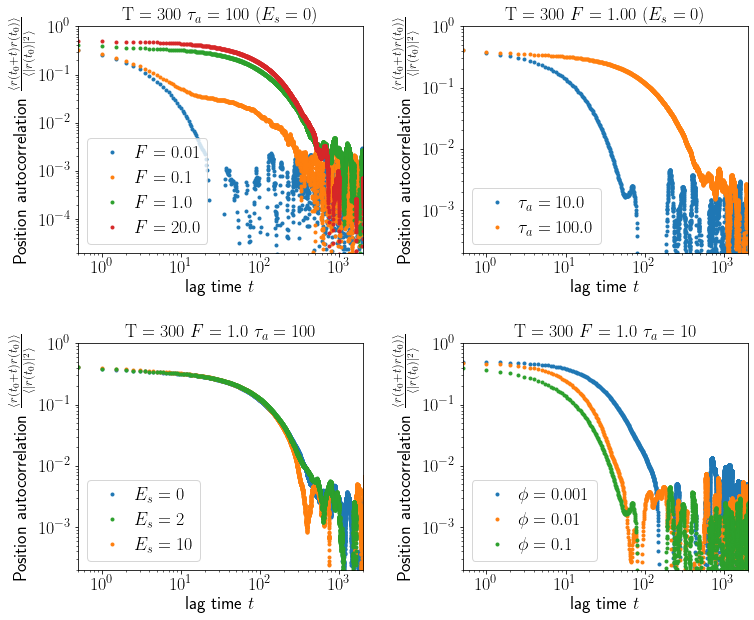

In [85]:
fig2,axes=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[[ax1,ax2],[ax3,ax4]]=axes
dt=0.001
bl=500
ts=np.arange(0,50000,1)*bl*dt
g=0.1
fpath='../MSD-autocorr-data/'
for fname in os.listdir(fpath):
    if 'autocorr' in fname and 'npy' in fname and 'COM' not in fname:
        T= float(fname.split('_')[2].replace('T',''))
        F=float(fname.split('_')[4].replace('F',''))
        Ta=float(fname.split('_')[5].replace('Ta',''))
        kb=float(fname.split('_')[6].replace('kb',''))
        Esoft=float(fname.split('_')[7].replace('Esoft',''))
        vf=float(fname.split('_')[8].replace('vf',''))
        #print(T,F,Ta,kb,Esoft)
        
        if T==300.0 and Esoft==0 and Ta==100.0 and vf==0.1:
            if F==0.0 or F==5.0: continue
            ax1.loglog(ts,np.load(fpath+fname), '.', label='$F={}$'.format(F))
            ax1.set_title('$\\mathrm T={:.0f}$ $\\tau_a={:.0f}$ $(E_s={:.0f})$'.format(T,Ta,Esoft))
            print(fname.split('_'))
        if T==300.0 and F==1 and Esoft==0 and vf==0.1:
            ax2.loglog(ts,np.load(fpath+fname), '.', label='$\\tau_a={}$'.format(Ta))
            ax2.set_title('$\\mathrm T={:0.0f}$ $F={:0.2f}$ $(E_s={:.0f})$'.format(T,F,Esoft))
            #print(T,F,Ta,kb,Esoft)
            
        if (T==300.0) and F==1 and Ta==100.0 and vf==0.1:
            ax3.loglog(ts,np.load(fpath+fname), '.', label='$E_s={:0.0f}$'.format(Esoft))
            ax3.set_title('$\\mathrm T={:.0f}$ $F={}$ $\\tau_a={:0.0f}$'.format(T, F, Ta))
            #print(fname)
            #print(T,F,Ta,kb,Esoft)
        
        if (T==300.0) and (F==1) and Ta==10.0 and Esoft==0:
            ax4.loglog(ts,np.load(fpath+fname), '.', label='$\\phi={}$'.format(vf))
            ax4.set_title('$\\mathrm T={:.0f}$ $F={}$ $\\tau_a={:0.0f}$'.format(T, F, Ta))
            #print(fname)

for axi in axes.flatten():
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('Position autocorrelation $\\frac{{{\\langle r(t_0+t) r(t_0)\\rangle}}}{{{\\langle |r(t_0)|^2\\rangle}}}$')
    
    handles, labels = axi.get_legend_handles_labels()
    #print(labels)
    hl = sorted(zip(handles, labels),
            key=lambda x: float(x[1].split('=')[1].replace('$','')))
    handles2, labels2 = zip(*hl)
    #print(labels2)
    axi.legend(handles2, labels2)
    axi.set_ylim([2e-4,1])
    axi.set_xlim([5e-1,2e3])

ax1.set_ylim([2e-5,1])
#ax4.legend(ncol=2)

#fig2.savefig('../plots/Rouse_chain_pos-autocorr_T300_vary_FTaEsPhi.png', dpi=300, bbox_inches='tight')

['Rouse', 'chain', 'T300.0', 'g0.1', 'F0.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'MSD-full', '1.npy']
['Rouse', 'chain', 'T50.0', 'g0.1', 'F0.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'MSD-full', '1.npy']


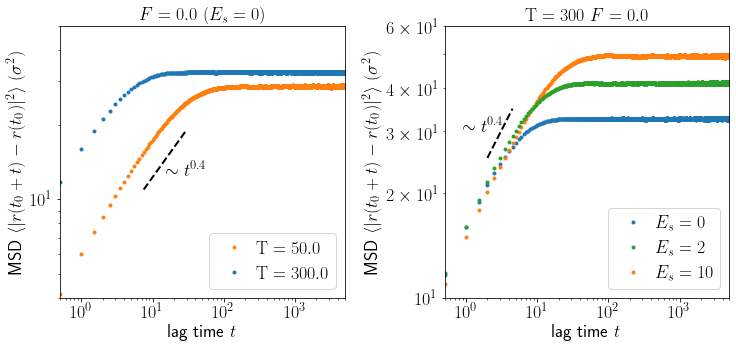

In [80]:
fig3,axes=plt.subplots(1,2,figsize=(12,5),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[ax1,ax2]=axes
dt=0.001
bl=500
ts=np.arange(0,50000,1)*bl*dt
g=0.1
fpath='../MSD-autocorr-data/'
for fname in os.listdir(fpath):
    if 'MSD-full' in fname and 'npy' in fname and 'COM' not in fname:
        T= float(fname.split('_')[2].replace('T',''))
        F=float(fname.split('_')[4].replace('F',''))
        Ta=float(fname.split('_')[5].replace('Ta',''))
        kb=float(fname.split('_')[6].replace('kb',''))
        Esoft=float(fname.split('_')[7].replace('Esoft',''))
        vf=float(fname.split('_')[8].replace('vf',''))
        #print(T,F,Ta,kb,Esoft)
        
        if F==0.0 and Esoft==0 and Ta==100.0 and vf==0.1:
            if T==0.0: continue
            ax1.loglog(ts,np.load(fpath+fname), '.', label='$\\mathrm T={}$'.format(T))
            ax1.set_title('$F={}$ $(E_s={:.0f})$'.format(F,Esoft))
            print(fname.split('_'))
            
        if F==0.0 and Ta==100.0 and vf==0.1 and T==300.0:
            ax2.loglog(ts,np.load(fpath+fname), '.', label='$E_s={:.0f}$'.format(Esoft))
            ax2.set_title('$\\mathrm T={:0.0f}$ $F={}$ '.format(T,F))
            #print(T,F,Ta,kb,Esoft)
            
        
for axi in axes.flatten():
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('MSD $\\langle |r(t_0+t) - r(t_0)|^2\\rangle$ $(\\sigma^2)$')
    
    handles, labels = axi.get_legend_handles_labels()
    #print(labels)
    hl = sorted(zip(handles, labels),
            key=lambda x: float(x[1].split('=')[1].replace('$','')))
    handles2, labels2 = zip(*hl)
    #print(labels2)
    axi.legend(handles2, labels2)
    
    axi.set_xlim([5e-1,5e3])

#ax1.legend(ncol=2)
#ax4.legend(ncol=2)
ax1.set_ylim([4,50])
#ax1.legend(loc='lower right',)
ax2.set_ylim([10,60])
ax3.set_ylim([10,80])
ax4.set_ylim([10,5e3])

#annotate_scaling(ax1,[10,10],1,place='bottom') 
#annotate_scaling(ax1,[1,30],0.4,place='bottom',p=2.,t=2.5)      
annotate_scaling(ax1,[15,15],0.4,place='bottom',t=1.2,p=2)   

annotate_scaling(ax2,[3,30],0.4,place='top',p=1.5,t=3.4)   

#annotate_scaling(ax3,[80,20],1,placement='bottom') 
#annotate_scaling(ax3,[8,2e-1],1.5,place='bottom',p=1.5)      
#annotate_scaling(ax3,[2e2,20],0.5,place='top',p=2.5)  
#annotate_scaling(ax3,[2,20],0.2,placement='top',sc=2.5)  

fig3.savefig('../plots/Rouse_chain_MSD_F0_vary_TEs.png', dpi=300, bbox_inches='tight')

['Rouse', 'chain', 'T300.0', 'g0.1', 'F0.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']
['Rouse', 'chain', 'T50.0', 'g0.1', 'F0.0', 'Ta100.0', 'kb10.0', 'Esoft0.0', 'vf0.1', 'pos-autocorr', '1.npy']


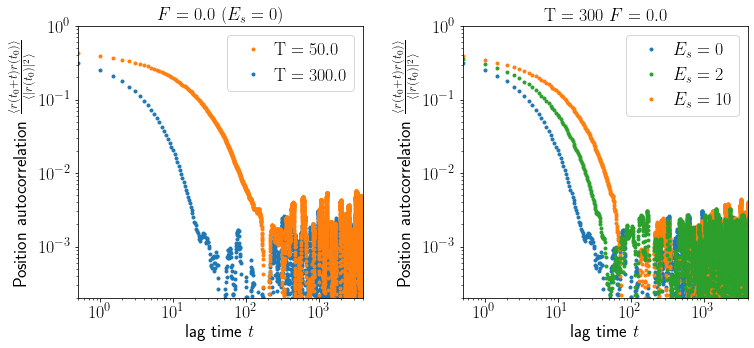

In [82]:
fig4,axes=plt.subplots(1,2,figsize=(12,5),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[ax1,ax2]=axes
dt=0.001
bl=500
ts=np.arange(0,50000,1)*bl*dt
g=0.1
fpath='../MSD-autocorr-data/'
for fname in os.listdir(fpath):
    if 'autocorr' in fname and 'npy' in fname and 'COM' not in fname:
        T= float(fname.split('_')[2].replace('T',''))
        F=float(fname.split('_')[4].replace('F',''))
        Ta=float(fname.split('_')[5].replace('Ta',''))
        kb=float(fname.split('_')[6].replace('kb',''))
        Esoft=float(fname.split('_')[7].replace('Esoft',''))
        vf=float(fname.split('_')[8].replace('vf',''))
        #print(T,F,Ta,kb,Esoft)
        
        if F==0.0 and Esoft==0 and Ta==100.0 and vf==0.1:
            if T==0.0: continue
            ax1.loglog(ts,np.load(fpath+fname), '.', label='$\\mathrm T={}$'.format(T))
            ax1.set_title('$F={}$ $(E_s={:.0f})$'.format(F,Esoft))
            print(fname.split('_'))
        if F==0.0 and Ta==100.0 and vf==0.1 and T==300.0:
            ax2.loglog(ts,np.load(fpath+fname), '.', label='$E_s={:.0f}$'.format(Esoft))
            ax2.set_title('$\\mathrm T={:0.0f}$ $F={}$ '.format(T,F))
            

for axi in axes.flatten():
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('Position autocorrelation $\\frac{{{\\langle r(t_0+t) r(t_0)\\rangle}}}{{{\\langle |r(t_0)|^2\\rangle}}}$')
    
    handles, labels = axi.get_legend_handles_labels()
    #print(labels)
    hl = sorted(zip(handles, labels),
            key=lambda x: float(x[1].split('=')[1].replace('$','')))
    handles2, labels2 = zip(*hl)
    #print(labels2)
    axi.legend(handles2, labels2)
    axi.set_ylim([2e-4,1])
    axi.set_xlim([5e-1,4e3])

#ax1.set_ylim([2e-5,1])
#ax4.legend(ncol=2)

fig4.savefig('../plots/Rouse_chain_pos-autocorr_F0_vary_TEs.png', dpi=300, bbox_inches='tight')

(1, 200000.0)

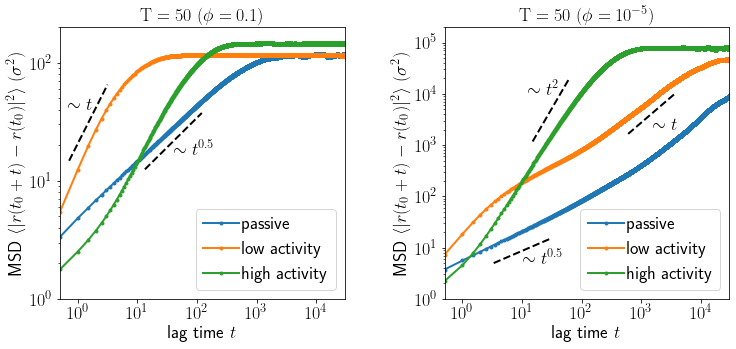

In [58]:
fig2,axes=plt.subplots(1,2,figsize=(12,5),gridspec_kw={'wspace':0.35, 'hspace':0.4})

[ax1,ax2]=axes
dt=0.001
bl=500
ts=np.arange(0,99901,1)*bl*dt
g=0.1
fpath='../data-8-rings/'

for fname in os.listdir(fpath):
    if 'MSD' in fname and 'npz' in fname and 'COM' not in fname:
        #print(fname.split('_'))
        T= float(fname.split('_')[4].replace('T',''))
        F=float(fname.split('_')[6].replace('F',''))
        Ta=float(fname.split('_')[7].replace('Ta',''))
        #kb=float(fname.split('_')[8].replace('kb',''))
        Esoft=float(fname.split('_')[9].replace('Esoft',''))
        vf=float(fname.split('_')[10].replace('vf',''))
        if vf==0.0: vf=0.00001
        #print(T,F,Ta,Esoft,vf)
        
        if Esoft==5 and T==50.0:
            
            if F==0.01 and Ta==100.0:
                
                if vf==0.1:
                    npzfile=np.load(fpath+fname)
                    ax1.loglog(ts, npzfile['MSD'][0], '.-', label='passive')
                
                if vf==0.00001:
                    npzfile=np.load(fpath+fname)
                    ax2.loglog(ts, npzfile['MSD'][0], '.-', label='passive')
                
            
            if F==1.0 and Ta==100.0:
                if vf==0.1:
                    npzfile=np.load(fpath+fname)
                    ax1.loglog(ts, npzfile['MSD'][0], '.-', label='high activity')
                
                if vf==0.00001:
                    npzfile=np.load(fpath+fname)
                    ax2.loglog(ts, npzfile['MSD'][0], '.-', label='high activity')
                
            
            if F==1.0 and Ta==1.0:
                if vf==0.1:
                    npzfile=np.load(fpath+fname)
                    ax1.loglog(ts, npzfile['MSD'][0], '.-', label='low activity')
                if vf==0.00001:
                    npzfile=np.load(fpath+fname)
                    ax2.loglog(ts, npzfile['MSD'][0], '.-', label='low activity')
                    
            
                ax1.set_title('$\\mathrm T=50$ $(\\phi=0.1)$ ')
                ax2.set_title('$\\mathrm T=50$ $(\\phi=10^{-5})$ ')

                
                
annotate_scaling(ax1,[40,25],0.5,place='bottom',p=3,t=1.5)   
#annotate_scaling(ax1,[6e3,1e3],1,place='bottom',p=2.5,t=3)
annotate_scaling(ax1,[1.5,40],1,place='top',p=2.1,t=2.3) 
#annotate_scaling(ax1,[10,.5],1.5,place='bottom',p=2.,t=2.5)      
#annotate_scaling(ax1,[2,40],0.5,place='top',t=2.5)   

annotate_scaling(ax2,[30,1e4],2,place='top',p=2,t=2.5)   
annotate_scaling(ax2,[1.5e3,6e3],1,place='bottom',p=2.5,t=3)
annotate_scaling(ax2,[10,10],0.5,place='bottom',p=3,t=2) 
#annotate_scaling(ax3,[2,3],0.5,place='bottom',p=3,t=1.4)  
#annotate_scaling(ax3,[1e3,6e3],1,place='bottom',p=4,t=3.5) 
#annotate_scaling(ax3,[2,20],0.2,placement='top',sc=2.5)  

for axi in axes.flatten():
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('MSD $\\langle |r(t_0+t) - r(t_0)|^2\\rangle$ $(\\sigma^2)$')
    
    #handles, labels = axi.get_legend_handles_labels()
    #print(labels)
    #hl = sorted(zip(handles, labels),
    #        key=lambda x: float(x[1].split('=')[1].replace('$','')))
    #handles2, labels2 = zip(*hl)
    #print(labels2)
    #axi.legend(handles2, labels2)
    axi.legend(loc='lower right')
    axi.set_xticks([1e-1,1,10,1e2,1e3,1e4,1e5])
    axi.set_xlim([5e-1,3e4])

ax1.set_ylim([1,2e2])    
ax2.set_ylim([1,2e5])
    #

#ax1.legend(ncol=2)
#ax4.legend(ncol=2)
#ax1.set_ylim([1,2e5])
#ax1.legend(loc='lower right',)
#ax2.set_ylim([10,60])
#ax3.set_ylim([10,80])
#ax4.set_ylim([10,5e3])


#fig2.savefig('../plots/Rouse_chain_MSD_compare_passive_active.png', dpi=300, bbox_inches='tight')

In [2]:
nbl=8000000
for ii, _ in enumerate(range(nbl)):
    # sim.runSimBlock(args.blocksize)
    #sim.saveStructure()
    if ii<20000: continue
    # state = sim.context.getState(getPositions=True,
            # getVelocities=False, getEnergy=False)
    #vel = state.getVelocities(asNumpy=True)#/unit.sqrt(unit.kilojoule_per_mole / mass)
    # positions.append(state.getPositions(asNumpy=True))
    
    if ii%int(nbl*0.1)==0 and ii>0==0:
        print(ii)

800000
1600000
2400000
3200000
4000000
4800000
5600000
6400000
7200000


In [5]:
sps=10000
bls=100
dt=0.0001
print(1e7*bls/(sps*3600))

27.77777777777778
